# Polynomial Regression

In this notebook polynomial regression model has been built using scikit-learn.Dataset related to consumption of fuel and CO2 emmision of cars is used.

## Importing Packages

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Undestanding Dataset

### `FuelConsumption.csv`:
Dataset downloaded is a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)


- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [43]:
df=pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Following features have been used in this used in this notebook for polynomial regression model.

In [44]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

cdf.head(11)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


# Splitting Dataset into Train, Test

In [45]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Polynomial Regression

Trend of data is not always linear and sometimes it exhibits curve like shape.In such cases polynomial regression analysis can be used. Sevral type of regression such as quardatic, cubic and many more exist than can be used to fit whatever the dataset looks like.

All of the cases where relationship between independent variable $x$ and dependent variable $y$ is modeled as nth degree polynomial in $x$ are called polynomial regression.

A second degree polynomial is shown below,

$y = b + \theta_1  x + \theta_2 x^2$

Question arises how to fit data on this equation if our data set is comprised of jut single variable like __Engine Size__.In such cases addition features 1, $x$ , $x^2$ can be created.

Scikit-learn function __PolynomialFeatures()__ creates a new set of features using orignal features. A matrix is generated which consist of all possible polynomial combinations of features with degree less than or equal to specified degree.

For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)

train_x_poly=poly.fit_transform(train_x)

test_x_poly=poly.fit_transform(test_x)

print("Train_x_poly:")

print(train_x_poly)

print("******************************************")

print("Test_x_poly:")

print(test_x_poly)


Train_x_poly:
[[ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 [ 1.    3.5  12.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]
******************************************
Test_x_poly:
[[ 1.    2.    4.  ]
 [ 1.    3.7  13.69]
 [ 1.    5.9  34.81]
 [ 1.    5.9  34.81]
 [ 1.    2.    4.  ]
 [ 1.    2.    4.  ]
 [ 1.    4.   16.  ]
 [ 1.    3.    9.  ]
 [ 1.    5.2  27.04]
 [ 1.    5.2  27.04]
 [ 1.    5.2  27.04]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]
 [ 1.    4.   16.  ]
 [ 1.    6.   36.  ]
 [ 1.    6.8  46.24]
 [ 1.    2.    4.  ]
 [ 1.    2.    4.  ]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    2.    4.  ]
 [ 1.    4.4  19.36]
 [ 1.    4.4  19.36]
 [ 1.    3.    9.  ]
 [ 1.    4.4  19.36]
 [ 1.    4.4  19.36]
 [ 1.    4.4  19.36]
 [ 1.    3.    9.  ]
 [ 1.    3.6  12.96]
 [ 1.    3.6  12.96]
 [ 1.    2.    4.  ]
 [ 1.    3.6  12.96]
 [ 1.    3.6  12.96]
 [ 1.    3.6  12.96]
 [ 1.    6.2  38.44]
 [ 1.    6.2  38.44]


**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

Now feature sets look like featuresfor  multiple linear regression analysis.

Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So,  same mechanism as linear regression can be used to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

## Outlining and trainng Model

In [47]:
model=linear_model.LinearRegression()
train_y_=model.fit(train_x_poly,train_y)

# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)


Coefficients:  [[ 0.         51.05125786 -1.62695656]]
Intercept:  [107.2982514]


__Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets.

Text(0,0.5,'Emission')

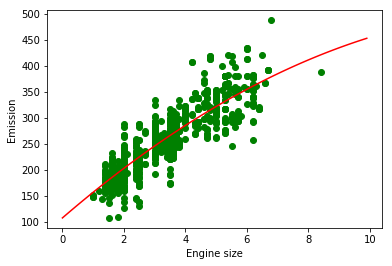

In [48]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='g')
XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_[0]+ model.coef_[0][1]*XX+ model.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation of Model

In [49]:
from sklearn.metrics import r2_score

test_y_=model.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.19
Residual sum of squares (MSE): 890.34
R2-score: 0.73


# Polynomial regression Model 2 

Polynomial regression model with degree three.


In [ ]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
model2 = linear_model.LinearRegression()
train_y3_ = model2.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)

yy = model2.intercept_[0]+ model2.coef_[0][1]*XX + model2.coef_[0][2]*np.power(XX, 2) + model2.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = model2.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )
